In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
def show_img(img):
    fig = plt.figure(figsize=(18, 16), dpi = 80, facecolor='w', edgecolor='k')
    plt.imshow(img)

In [3]:
def blur_img(img, blur_level):
    h, w = img.shape
    rw, rh = math.floor(w/blur_level), math.floor(h/blur_level)
    img_resized = cv.resize(img, (rw, rh))
    img_blured = cv.resize(img_resized, (w, h))
    return img_blured

In [4]:
def sub_img(img, wsub, hsub):
    blur_pieces = []
    h, w = img.shape
    wsubsize, hsubsize = math.floor(w/wsub), math.floor(h/hsub)
    for i in range(hsub-1):
        for j in range(wsub-1):
            blur_pieces.append(img[hsubsize*i:hsubsize*(i+1), wsubsize*j:wsubsize*(j+1)])
    return blur_pieces

In [5]:
def to_binary(img):
    thresh, im = cv.threshold(img, 170,255, cv.THRESH_BINARY );
    return im

### Load Data

In [6]:

import glob

training_path = './data/Book/'
training_data = []
img_set, blur_set = [], []
for filename in glob.glob(training_path+'/*.jpg'):
    im = cv.imread(filename, 0)
    w, h = im.shape
    im = cv.resize(im, (math.floor(h/3), math.floor(w/3)))
    im = sub_img(im, 9*6, 12*6)
    img_set += [x / 255 for x in im]
random.shuffle(img_set)

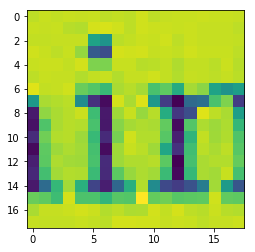

In [8]:
%matplotlib inline
pick_random = random.randrange(len(img_set))
# print(img_set[pick_random])
plt.imshow(img_set[pick_random])

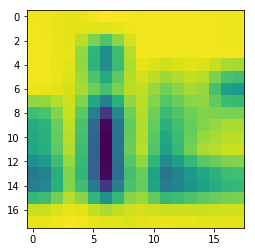

In [9]:
test = blur_img(img_set[pick_random], blur_level=1.5+random.random())
plt.imshow(test)

In [10]:
print('Number of images:', len(img_set), 'Size:', img_set[0].shape)

Number of images: 150520 Size: (18, 18)


### Building Model

Placeholders

In [11]:
IMGSIZE = img_set[0].shape[0]
COLOR_CHANNELS = 1
print(IMGSIZE)
data_ph = tf.placeholder('float32',[None, IMGSIZE*IMGSIZE*COLOR_CHANNELS])
output_ph = tf.placeholder('float32',[None, IMGSIZE*IMGSIZE*COLOR_CHANNELS])
learning_rate = tf.placeholder('float', [], name = 'learning_rate_ph')

18


Using TensorFlow backend.
